<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/random_forest_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [12]:
X.shape

(500, 2)

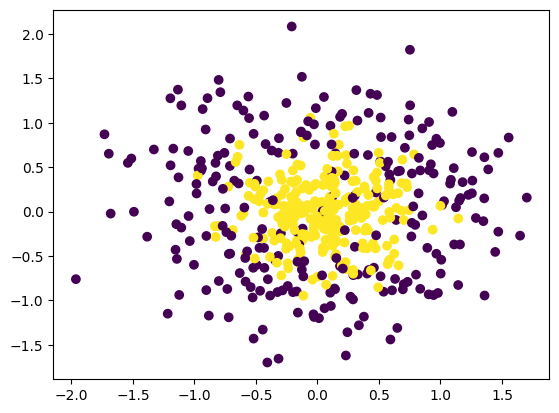

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

In [14]:
from sklearn.tree import DecisionTreeClassifier

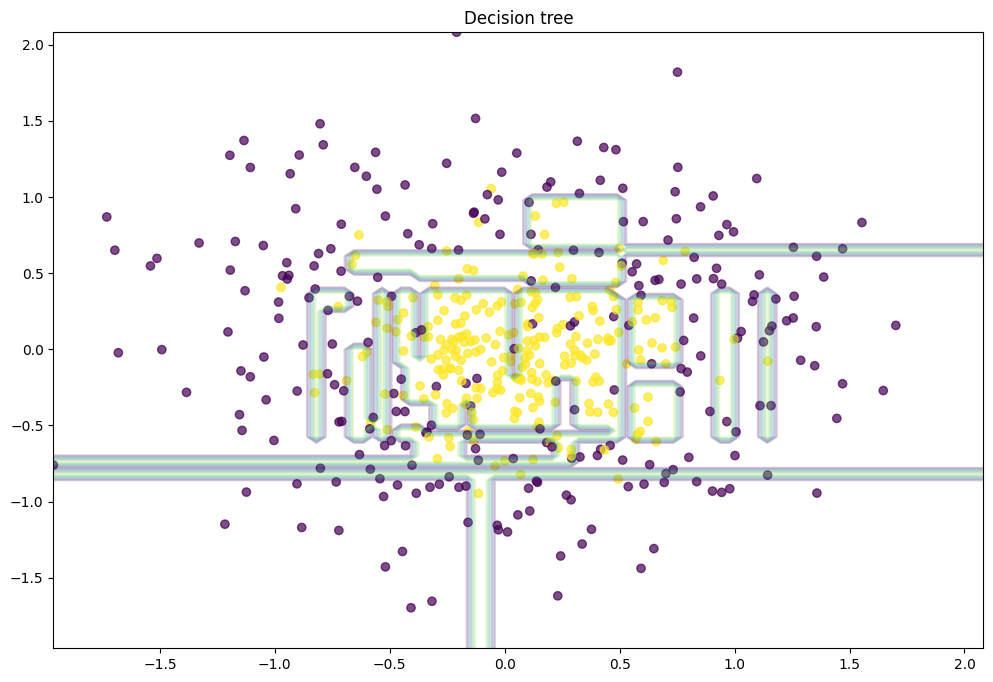

In [15]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y,cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

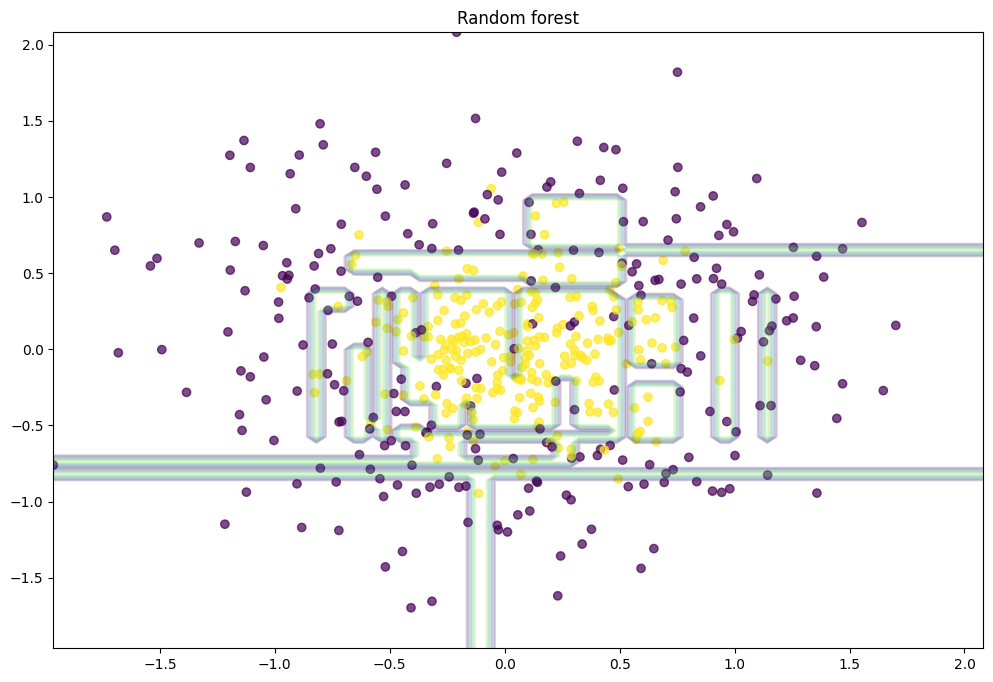

In [20]:
rf = RandomForestClassifier(n_estimators=50,  random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y,cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [23]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [25]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.127303,0.894951,-0.600518,-1.191874,-1.573884,0
1,1.358732,-0.317099,-1.022977,-0.844633,-1.257109,1
2,-0.357856,-0.732070,1.007794,0.276790,-2.545119,0
3,-0.908792,0.922910,2.763722,1.154730,-0.059090,0
4,-1.616429,0.557361,-2.640315,-3.413477,-2.837048,0


In [26]:
bag = BaggingClassifier(max_features=2)

In [27]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

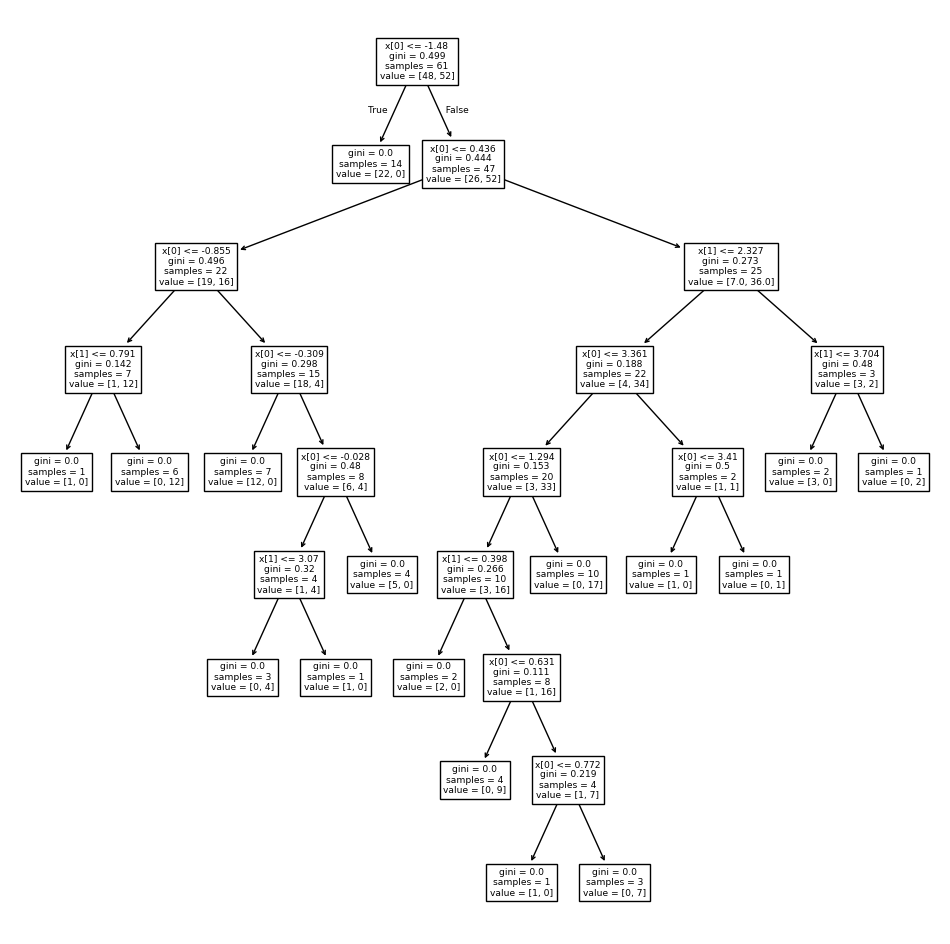

In [28]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [29]:
rf = RandomForestClassifier(max_features=2)

In [30]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

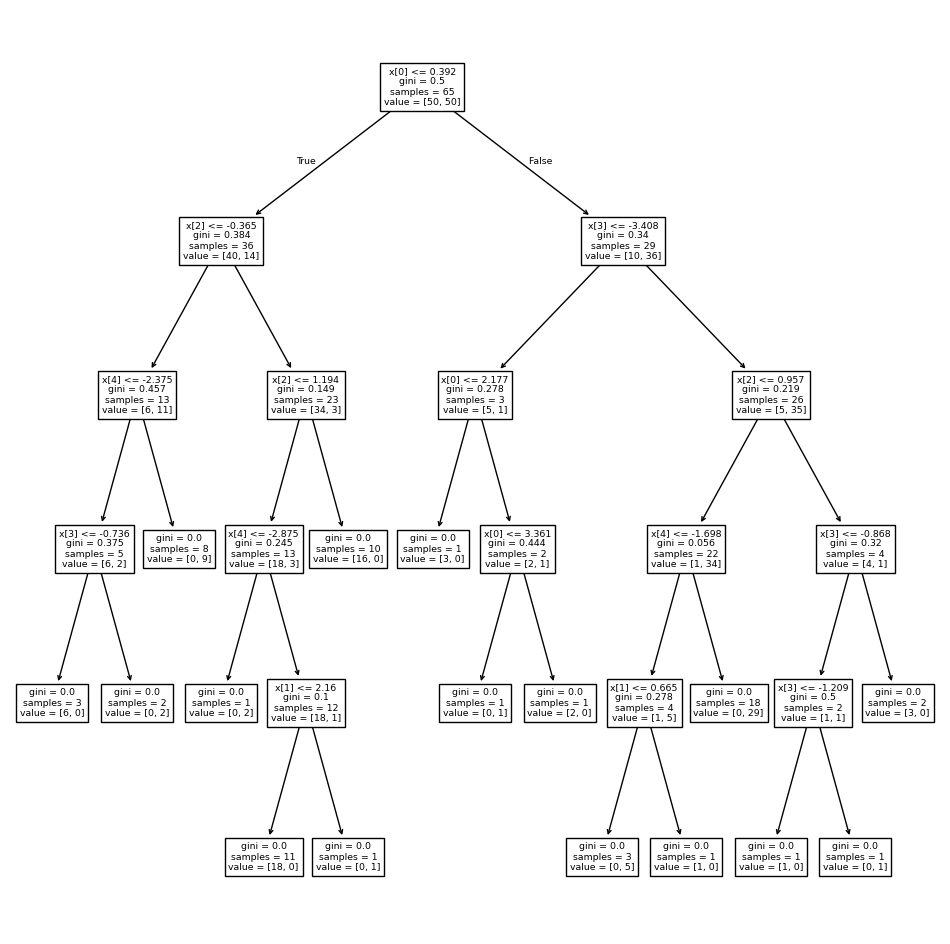

In [31]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()